In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [8]:
import os
cwd = os.getcwd()
print(cwd)
df = pd.read_csv('lending_club_loan_two.csv')
df.info()

d:\ML\Machine-Learning\Artificial Neural Network
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  tit

<AxesSubplot:>

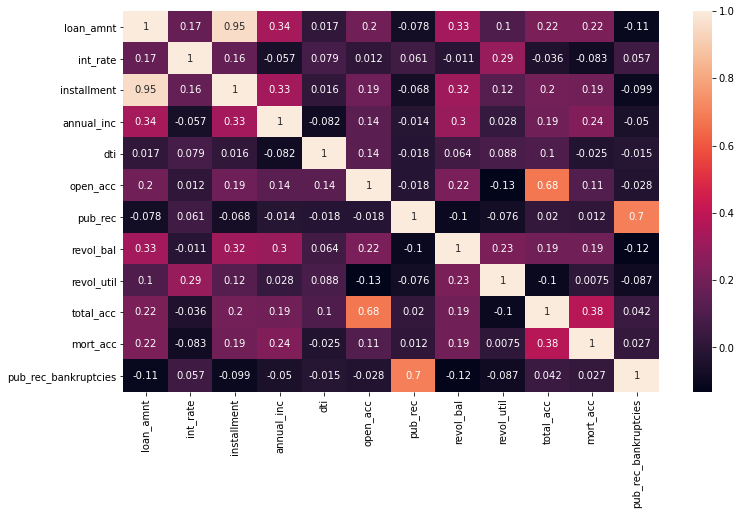

In [9]:
df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
#plt.ylim(12,0)

In [10]:
df["loan_repaid"] = df["loan_status"] 
df["loan_repaid"] = df["loan_repaid"].replace({'Charged Off':0, 'Fully Paid':1})
df[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [11]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [12]:
df["emp_title"].describe()
df = df.drop('emp_title', axis=1)

In [13]:
df.emp_length.unique()
df = df.drop('emp_length', axis=1)

In [14]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [15]:
#df[['purpose', 'title']]
df = df.drop('title', axis=1)

In [16]:
df.isnull().sum()
df['mort_acc'].describe()
df.corr()['mort_acc']
avg = df.groupby('total_acc').mean()['mort_acc']
avg


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [17]:
def avg_mort(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return avg[total_acc]
    else:
        return mort_acc

df['mort_acc'] = df.apply(lambda x: avg_mort(x['total_acc'],x['mort_acc']), axis=1)

In [18]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [21]:
list(df.select_dtypes(['object']).columns)

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [22]:
df.term.unique()
df['term'] = df['term'].replace({' 36 months':36, ' 60 months':60})
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [23]:
df['grade'].head()
df.grade.unique()
df = df.drop('grade', axis=1)

In [24]:
df['sub_grade'].head()
dum = pd.get_dummies(df['sub_grade'], drop_first=True)
df = df.drop('sub_grade', axis=1)
df = pd.concat([df, dum], axis=1)

In [25]:
list(df.select_dtypes(['object']).columns)

['home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [26]:
df['home_ownership'].describe()
df.home_ownership.unique()
df['home_ownership'] = df['home_ownership'].replace({'ANY':'OTHER', 'NONE':'OTHER'})
dum1 = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df, dum1], axis=1)

In [27]:
list(df.select_dtypes(['object']).columns)

['verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [28]:
df['verification_status'].head()
df.verification_status.unique()
dum2 = pd.get_dummies(df['verification_status'], drop_first=True)
df = df.drop('verification_status', axis=1)
df = pd.concat([df, dum2], axis=1)

In [29]:
df.issue_d.unique()
df = df.drop('issue_d', axis=1)

In [30]:
df.earliest_cr_line.unique()
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda earliest_cr_line: earliest_cr_line.year)

In [31]:
df = df.drop('earliest_cr_line', axis=1)

In [32]:
list(df.select_dtypes(['object']).columns)

['loan_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'address']

In [33]:
df.loan_status.unique()
df = df.drop('loan_status', axis=1)

In [34]:
list(df.select_dtypes(['object']).columns)

['purpose', 'initial_list_status', 'application_type', 'address']

In [35]:
df.purpose.unique()
dum3 = pd.get_dummies(df['purpose'], drop_first=True)
df = df.drop('purpose', axis=1)
df = pd.concat([df, dum3], axis=1)

In [36]:
df.initial_list_status.unique()
df['initial_list_status'] = df['initial_list_status'].replace({'w':0, 'f':1})

In [37]:
df.application_type.unique()
dum4 = pd.get_dummies(df['application_type'], drop_first=True)
df = df.drop('application_type', axis=1)
df = pd.concat([df, dum4], axis=1)


In [38]:
df.address.describe()
df['zip'] = df['address'].apply(lambda z: z[-5:])
df['zip'].unique()
dum5 = pd.get_dummies(df['zip'], drop_first=True)
df = df.drop('zip', axis=1)
df = df.drop('address', axis=1)
df = pd.concat([df, dum5], axis=1)


In [39]:
list(df.select_dtypes(['object']).columns)

[]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [43]:
from sklearn.preprocessing import MinMaxScaler
my_scale = MinMaxScaler()
X_train = my_scale.fit_transform(X_train)
X_test = my_scale.transform(X_test)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
X_train.shape

(316175, 78)

In [45]:
model = Sequential()
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 7s 4ms/step - loss: 0.2956 - val_loss: 0.2645
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2648 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2626 - val_loss: 0.2628
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2615 - val_loss: 0.2619
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2607 - val_loss: 0.2616
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2602 - val_loss: 0.2619
Epoch 7/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2596 - val_loss: 0.2616
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2594 - val_loss: 0.2616
Epoch 9/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2592 - val_loss: 0.2625
Epoch 10/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.259

<AxesSubplot:>

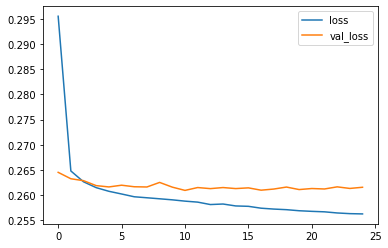

In [47]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(X_test)

2471/2471 [==============================] - 5s 2ms/step


In [49]:
predictions = np.where(predictions>0.5, 1,0)
predictions
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

